In [2]:
import pandas as pd

# Analisis básico

En esta notebook se hace un análisis muy básico de la data



In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
PATH=r"/content/gdrive/MyDrive/bioinformatics_final_project-main/"

In [6]:
df = pd.read_csv(PATH +'data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5658,CHEMBL4779440,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1.[Br-],10500.0,10500.0,4.978811
5659,CHEMBL417799,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,1220.0,1220.0,5.913640
5660,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,1450.0,1450.0,5.838632
5661,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,28980.0,4.537902


In [ ]:
df['molecule_chembl_id'].unique().shape

(5663,)

In [ ]:
# Rango dinámico del standar value
df['standard_value'].max(), df['standard_value'].min()

(5888436553555884.0, 5e-06)

In [ ]:
df['pIC50'].max(),df['pIC50'].min()

(14.30102999566398, -6.77)

# Histograma de longitudes de los smiles

In [ ]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))

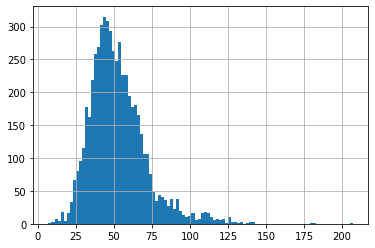

In [ ]:
df['canonical_len'].hist(bins=100)

In [ ]:
# Max y min 
max_sequence_len = df['canonical_len'].max()
max_sequence_len, df['canonical_len'].min()

(207, 7)

In [ ]:
max_len_idx = df['canonical_len'].argmax()
min_len_idx = df['canonical_len'].argmin()

In [ ]:
# Ejemplo de molécula más larga
df.iloc[max_len_idx].canonical_smiles

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

In [ ]:
# Ejemplo de molécula más corta
df.iloc[min_len_idx].canonical_smiles

'NC(=O)O'

# Histograma de caracteres

In [ ]:
from collections import Counter

In [ ]:
text = ''
for cs in df['canonical_smiles']:
    text = text + cs

In [ ]:
vocab_hist = dict(Counter(text))

In [ ]:
vocab_hist

{'#': 366,
 '(': 23466,
 ')': 23466,
 '+': 1296,
 '-': 2146,
 '.': 1316,
 '/': 1814,
 '1': 16666,
 '2': 13332,
 '3': 8199,
 '4': 3418,
 '5': 970,
 '6': 228,
 '7': 18,
 '8': 6,
 '=': 8654,
 '@': 4527,
 'B': 705,
 'C': 62280,
 'F': 1162,
 'H': 2456,
 'I': 109,
 'N': 10356,
 'O': 14002,
 'P': 34,
 'S': 628,
 '[': 5999,
 '\\': 372,
 ']': 5999,
 'a': 1,
 'c': 72764,
 'e': 35,
 'i': 2,
 'l': 1548,
 'n': 4542,
 'o': 779,
 'r': 681,
 's': 270}

In [ ]:
len(vocab_hist)

38

La longitud del vocabulario es de 38

La tokenizacion puede hacerse por caracter o por sentido quimico. Ej BR o B y R por separado. En esta primera instancia la hacemos por caracter.



# Etiquetado de compuestos como activos, inactivos o intermedios


Los datos de bioactividad están en la unidad IC50. Los compuestos que tengan valores inferiores a 1000 nM de acuerdo a lo que se muestra en el video se considerarán *activos* mientras que los superiores a 10.000 nM se considerarán *inactivos*. En cuanto a aquellos valores entre 1.000 y 10.000 nM se denominarán *intermedios*.

In [15]:
df2 = df.copy()

In [16]:

bioactivity_threshold = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [17]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df3= pd.concat([df2, bioactivity_class], axis=1)
df3

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910,active
...,...,...,...,...,...,...
5658,CHEMBL4779440,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1.[Br-],10500.0,10500.0,4.978811,inactive
5659,CHEMBL417799,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,1220.0,1220.0,5.913640,intermediate
5660,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,1450.0,1450.0,5.838632,intermediate
5661,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,28980.0,4.537902,inactive


In [18]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [11]:
 import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


**Grafico de frecuencia de las clases**

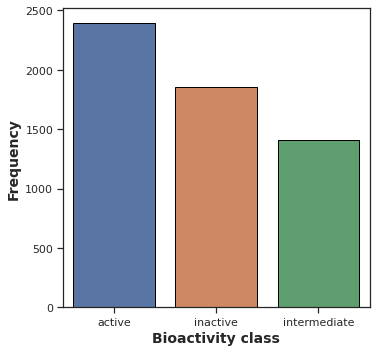

In [19]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df3, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

**Box plots Valor pIC50**

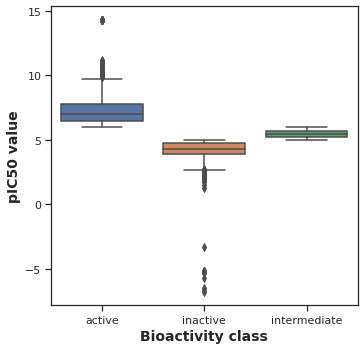

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')